In [22]:
# A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = r"C:\Users\sriva\Downloads\GST - C_AST (2).csv"
data = pd.read_csv(file_path)

# Assume last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # All rows, all columns except the last one
y = data.iloc[:, -1]   # All rows, only the last column

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluation metrics
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print("Training Set Metrics:")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1-Score: {train_f1}")

print("\nTest Set Metrics:")
print(f"Confusion Matrix:\n{test_conf_matrix}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-Score: {test_f1}")

# Infer the learning outcome based on training and test metrics
if train_f1 > test_f1 and (train_f1 - test_f1) > 0.1:
    print("\nModel is likely overfitting.")
elif abs(train_f1 - test_f1) <= 0.1:
    print("\nModel has a regular fit.")
else:
    print("\nModel may be underfitting.")


Training Set Metrics:
Confusion Matrix:
[[ 5  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  2  0  0  0  1  1  0  0  0]
 [ 1  0 28  1  3  1  2  0  0  0  0]
 [ 0  1  8 64  8  1  4  1  0  0  0]
 [ 0  1  7 18 90  6  2  0  0  1  1]
 [ 0  1  7  7 29 76  9  3  0  0  0]
 [ 1  4  5 13 15 21 94  3  1  0  4]
 [ 0  1  3 11 10 20 22 48  0  1  1]
 [ 0  3  5  8  6 10 17  3  8  1  1]
 [ 1  0  1  3  2  4  7  2  3  4  0]
 [ 0  1  6  4  4  5  9  2  4  0 17]]
Precision: 0.5717842929151824
Recall: 0.5443499392466585
F1-Score: 0.5256856046604844

Test Set Metrics:
Confusion Matrix:
[[ 0  1  0  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  3  1  1  0  0  0  0]
 [ 0  2  8  2  3  0  2  0  0  0  0]
 [ 0  0  7 20  7  6  1  0  0  0  0]
 [ 0  3  3 12 17  4  7  2  0  1  4]
 [ 0  1  6  6 11 20  9  6  2  0  1]
 [ 0  0  2 13  4  9 20  8  2  1  2]
 [ 0  1  1  7  4 20 18  8  3  1  2]
 [ 0  2  0  1  3  3  8  2  2  1  0]
 [ 0  0  0  2  0  4  0  1  1  0  2]
 [ 0  0  2  0  0  4  2  0  0  1  5]]
Precision: 0.27855608947613486
Recall: 0.28

C:\Users\sriva\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


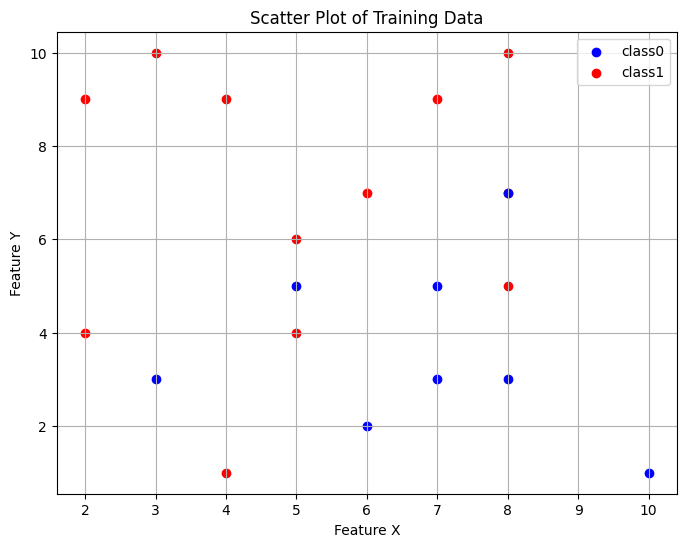

In [21]:
# A3
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 20 random data points for features X and Y
X = np.random.randint(1, 11, size=20)
Y = np.random.randint(1, 11, size=20)

# Randomly assign points to one of two classes
classes = np.random.choice([0, 1], size=20)

# Prepare the plot
plt.figure(figsize=(8, 6))

# Create a dictionary to map class labels to colors
color_map = {0: 'blue', 1: 'red'}
labels_map = {0: 'class0', 1: 'class1'}
used_labels = set()

# Plot points, color by class
for x, y, cls in zip(X, Y, classes):
    label = labels_map[cls] if labels_map[cls] not in used_labels else ""
    plt.scatter(x, y, color=color_map[cls], label=label)
    used_labels.add(labels_map[cls])

# Add legends, labels and title
plt.legend()
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.grid(True)

# Show plot
plt.show()


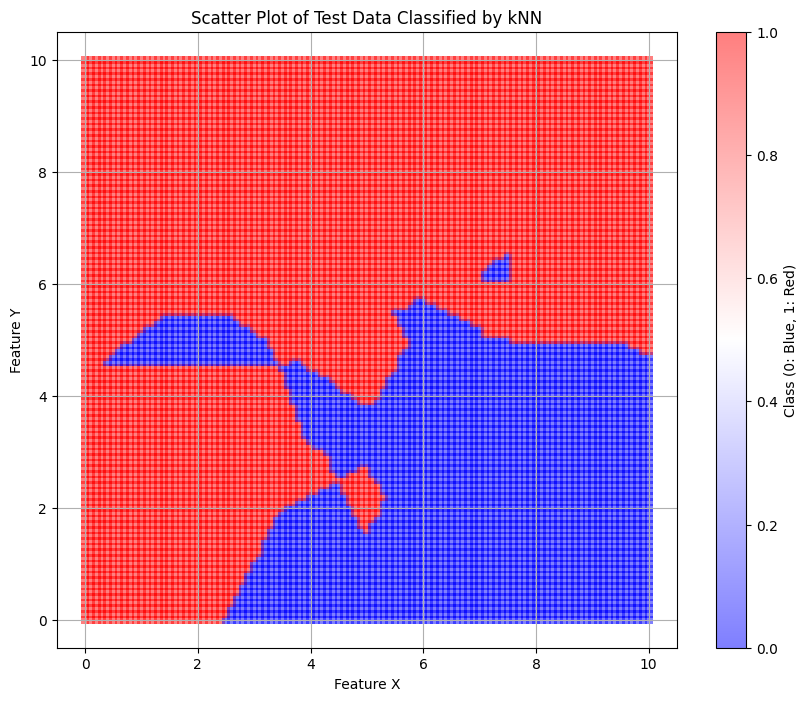

In [19]:
# A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=20)
Y_train = np.random.randint(1, 11, size=20)
classes = np.random.choice([0, 1], size=20)

# Combine X_train and Y_train into a single array for training
training_data = np.column_stack((X_train, Y_train))

# Create the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data, classes)

# Generate test data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Classify test data
test_predictions = knn.predict(test_data)

# Plot test data output
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.5, marker='s', edgecolor='none')
plt.colorbar(label='Class (0: Blue, 1: Red)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Test Data Classified by kNN')
plt.grid(True)
plt.show()


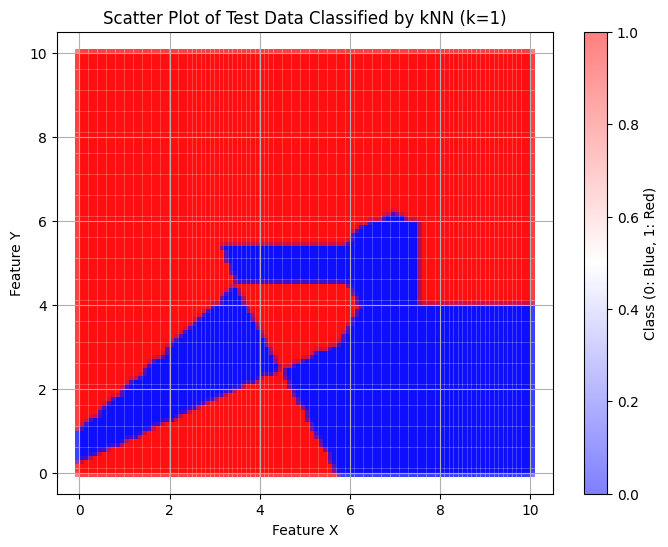

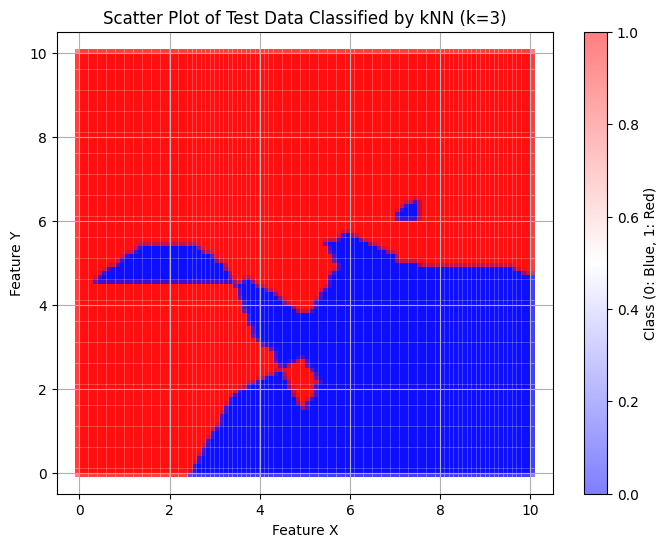

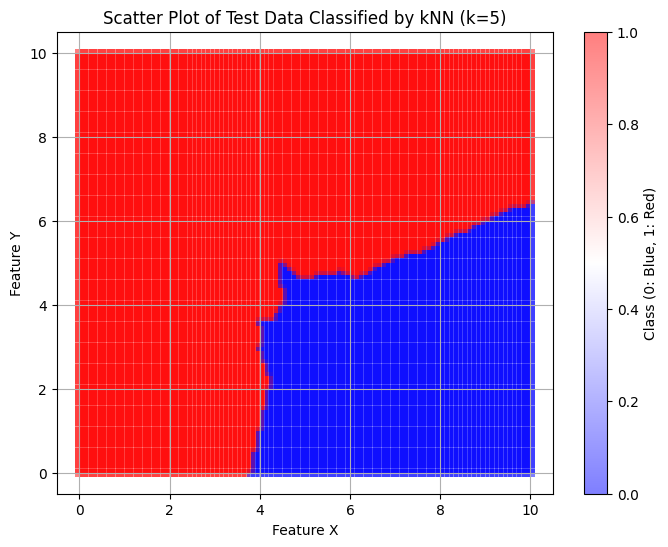

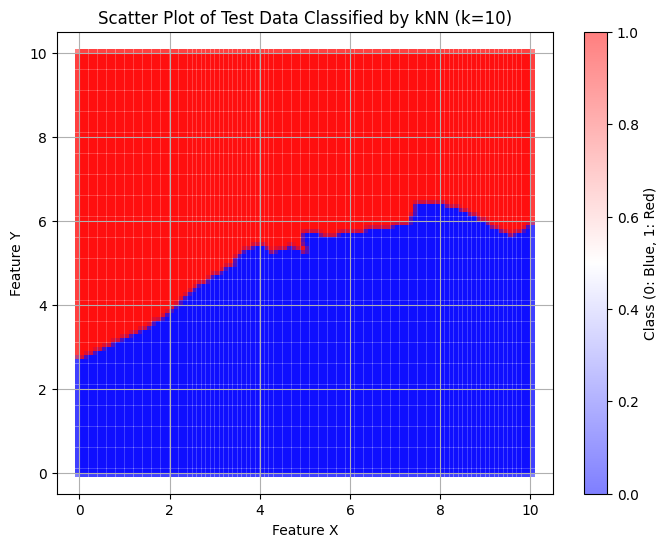

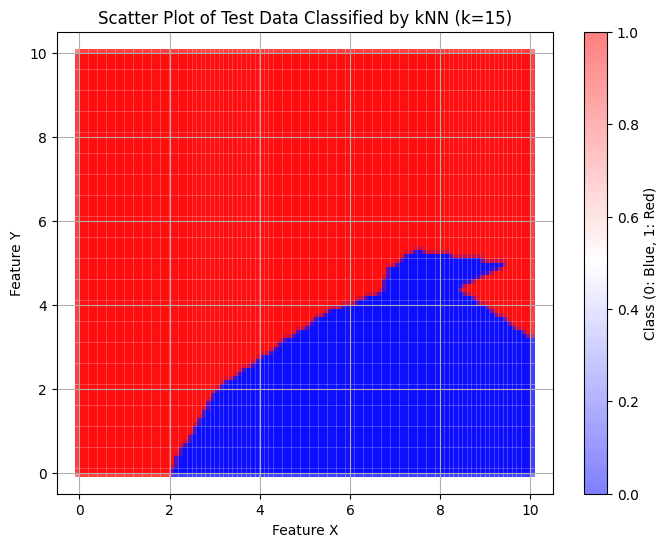

In [17]:
# A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=20)
Y_train = np.random.randint(1, 11, size=20)
classes = np.random.choice([0, 1], size=20)

# Combine X_train and Y_train into a single array for training
training_data = np.column_stack((X_train, Y_train))

# Generate test data
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Values of k to test
k_values = [1, 3, 5, 10, 15]

for k in k_values:
    # Create the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, classes)

    # Classify test data
    test_predictions = knn.predict(test_data)

    # Plot test data output
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(test_data[:, 0], test_data[:, 1], c=test_predictions, cmap='bwr', alpha=0.5, marker='s', edgecolor='none')
    plt.colorbar(scatter, label='Class (0: Blue, 1: Red)')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data Classified by kNN (k={k})')
    plt.grid(True)
    plt.show()


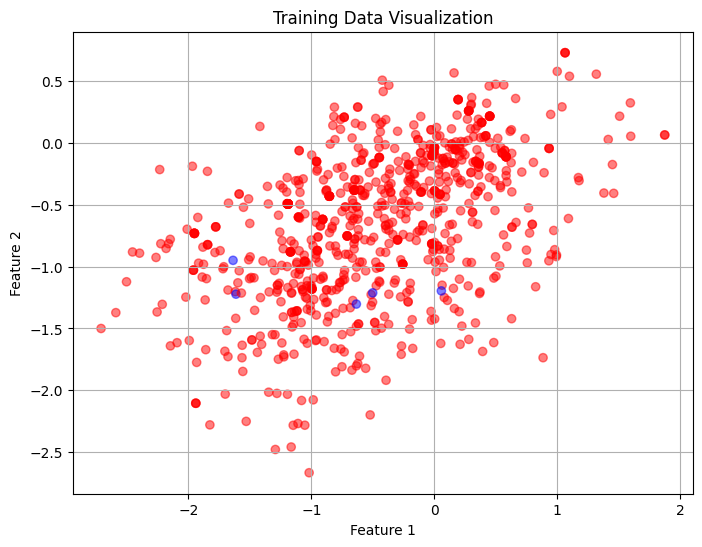

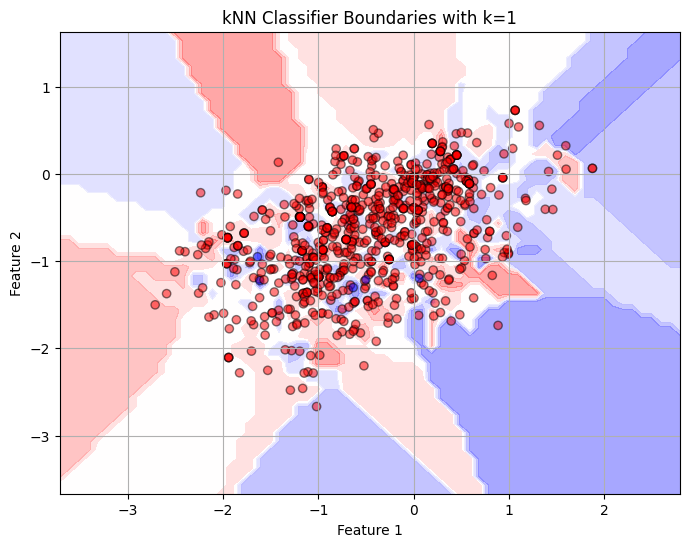

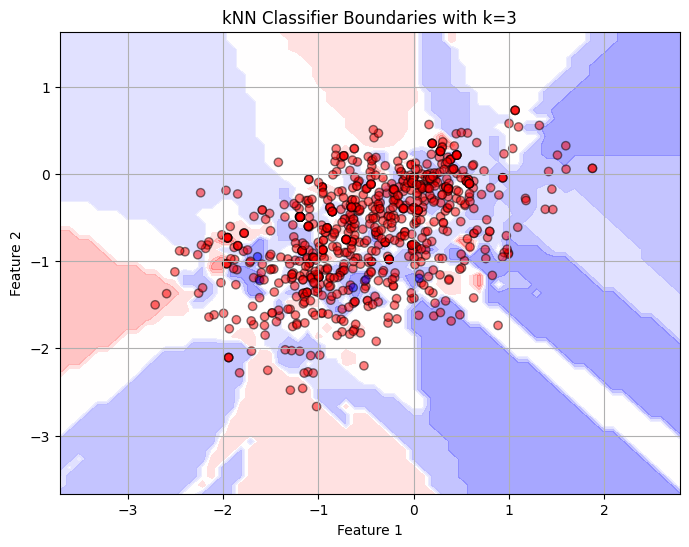

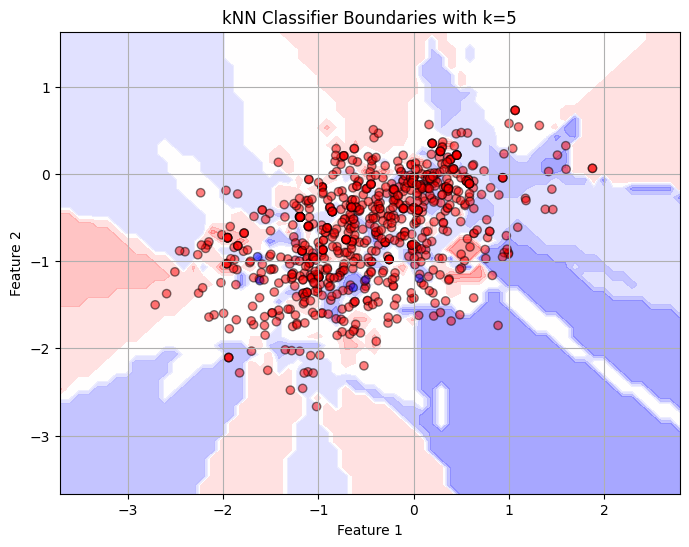

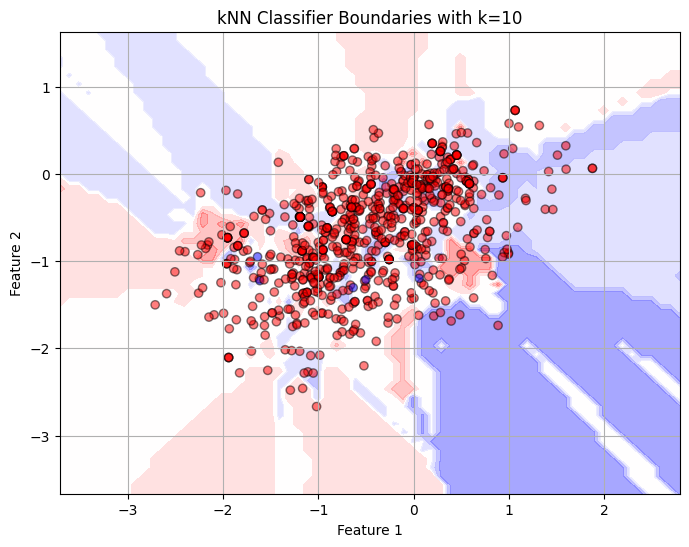

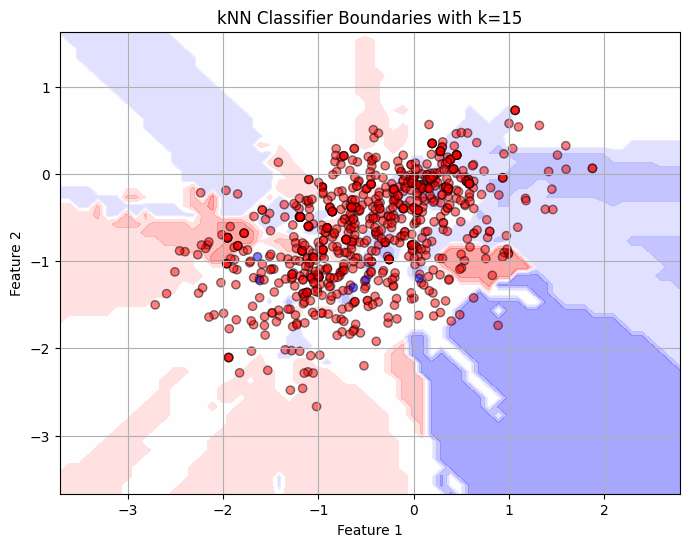

In [16]:
# A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv(r"C:\Users\sriva\Downloads\GST - C_AST (2).csv")

# Select two features and assume the class is the last column
X = data.iloc[:, [0, 1]].values  # Update indices according to your dataset's relevant features
y = data.iloc[:, -1].values  # Assumes class labels are in the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the training data
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Visualization')
plt.grid(True)
plt.show()

# Values of k to test
k_values = [1, 3, 5, 10, 15]

for k in k_values:
    # Create and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create a mesh grid for the background colors
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results with decision boundaries
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'kNN Classifier Boundaries with k={k}')
    plt.grid(True)
    plt.show()


In [15]:
# A7
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\sriva\Downloads\GST - C_AST (2).csv")

# Select two features and assume the class is the last column
X = data.iloc[:, [0, 1]].values  # Change as needed based on your dataset's relevant features
y = data.iloc[:, -1].values  # Assumes class labels are in the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the kNN classifier
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 31)}  # Test k from 1 to 30

# Use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation

# Fit model to data
knn_gscv.fit(X_train, y_train)

# Check top performing n_neighbors value
best_k = knn_gscv.best_params_['n_neighbors']
best_score = knn_gscv.best_score_

# Use the best k to predict the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Test set accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Best k: 12
Best cross-validation score: 0.2065
Test set accuracy: 0.2238
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        17
           3       0.18      0.15      0.16        41
           4       0.23      0.36      0.28        53
           5       0.22      0.23      0.22        62
           6       0.26      0.48      0.34        61
           7       0.26      0.12      0.17        65
           8       0.11      0.05      0.06        22
           9       0.09      0.10      0.10        10
          10       0.17      0.07      0.10        14

    accuracy                           0.22       353
   macro avg       0.14      0.14      0.13       353
weighted avg       0.20      0.22      0.20       353



C:\Users\sriva\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sriva\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sriva\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i